In [1]:
import pandas as pd
import numpy as np

In [2]:
Column_names=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','Target']

In [3]:
df = pd.read_csv('./kddcup.data.corrected.csv',names=Column_names)

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Target
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
df['T1'] = 1
df['T1'].loc[df.Target != 'normal.'] = 0

C:\Users\SaiRamMaganti\AppData\Local\Temp\ipykernel_14648\1679889257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['T1'].loc[df.Target != 'normal.'] = 0


In [6]:
data = df.drop(['T1'], axis=1)

In [7]:
labels=data['service'].unique()
values=[]
for i in labels:
    values.append(len(data.loc[(data['service']==i)]))

ar=sorted(list(zip(values,labels)),reverse=True)
for i in ar:
    print("{} : {}".format(i[1],i[0]),end=",")

ecr_i : 2811660,private : 1100831,http : 623091,smtp : 96554,other : 72653,domain_u : 57782,ftp_data : 40697,eco_i : 16338,finger : 6891,urp_i : 5378,ftp : 5214,telnet : 4277,ntp_u : 3833,auth : 3382,pop_3 : 1981,time : 1579,domain : 1113,Z39_50 : 1078,gopher : 1077,mtp : 1076,ssh : 1075,whois : 1073,remote_job : 1073,rje : 1070,link : 1069,imap4 : 1069,ctf : 1068,name : 1067,supdup : 1060,nntp : 1059,echo : 1059,discard : 1059,uucp_path : 1057,systat : 1056,sunrpc : 1056,netstat : 1056,daytime : 1056,pop_2 : 1055,netbios_ssn : 1055,netbios_ns : 1054,vmnet : 1053,sql_net : 1052,netbios_dgm : 1052,iso_tsap : 1052,shell : 1051,csnet_ns : 1051,klogin : 1050,hostnames : 1050,bgp : 1047,printer : 1045,login : 1045,exec : 1045,http_443 : 1044,efs : 1042,uucp : 1041,ldap : 1041,kshell : 1040,nnsp : 1038,courier : 1021,IRC : 521,urh_i : 148,X11 : 135,tim_i : 12,red_i : 9,pm_dump : 5,tftp_u : 3,http_8001 : 2,harvest : 2,aol : 2,http_2784 : 1,

In [8]:
ser_c=[]
for i in ar[11:]:
    ser_c.append(i[1])
data['service']=data['service'].replace(ser_c,'cc')

In [9]:
data['Target']=df['T1']

In [10]:
data.shape

(4898431, 42)

In [11]:
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [15]:
class_1=data[data['Target']==1]

In [18]:
class_0=data[data['Target']==0]

In [16]:
class1_len=len(class_1)

In [17]:
class1_len

972781

In [19]:
df_class0=class_0.sample(class1_len)

In [20]:
df_balance=pd.concat([df_class0,class_1],axis=0)

In [40]:
balance_data=df_balance.sample(frac=1).reset_index()

In [41]:
balance_data['Target'].value_counts()

1    972781
0    972781
Name: Target, dtype: int64

In [27]:
balance_data.to_csv('balance_data.csv')

In [42]:
data_temp = balance_data.drop(['service','protocol_type','flag','Target'],axis=1)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

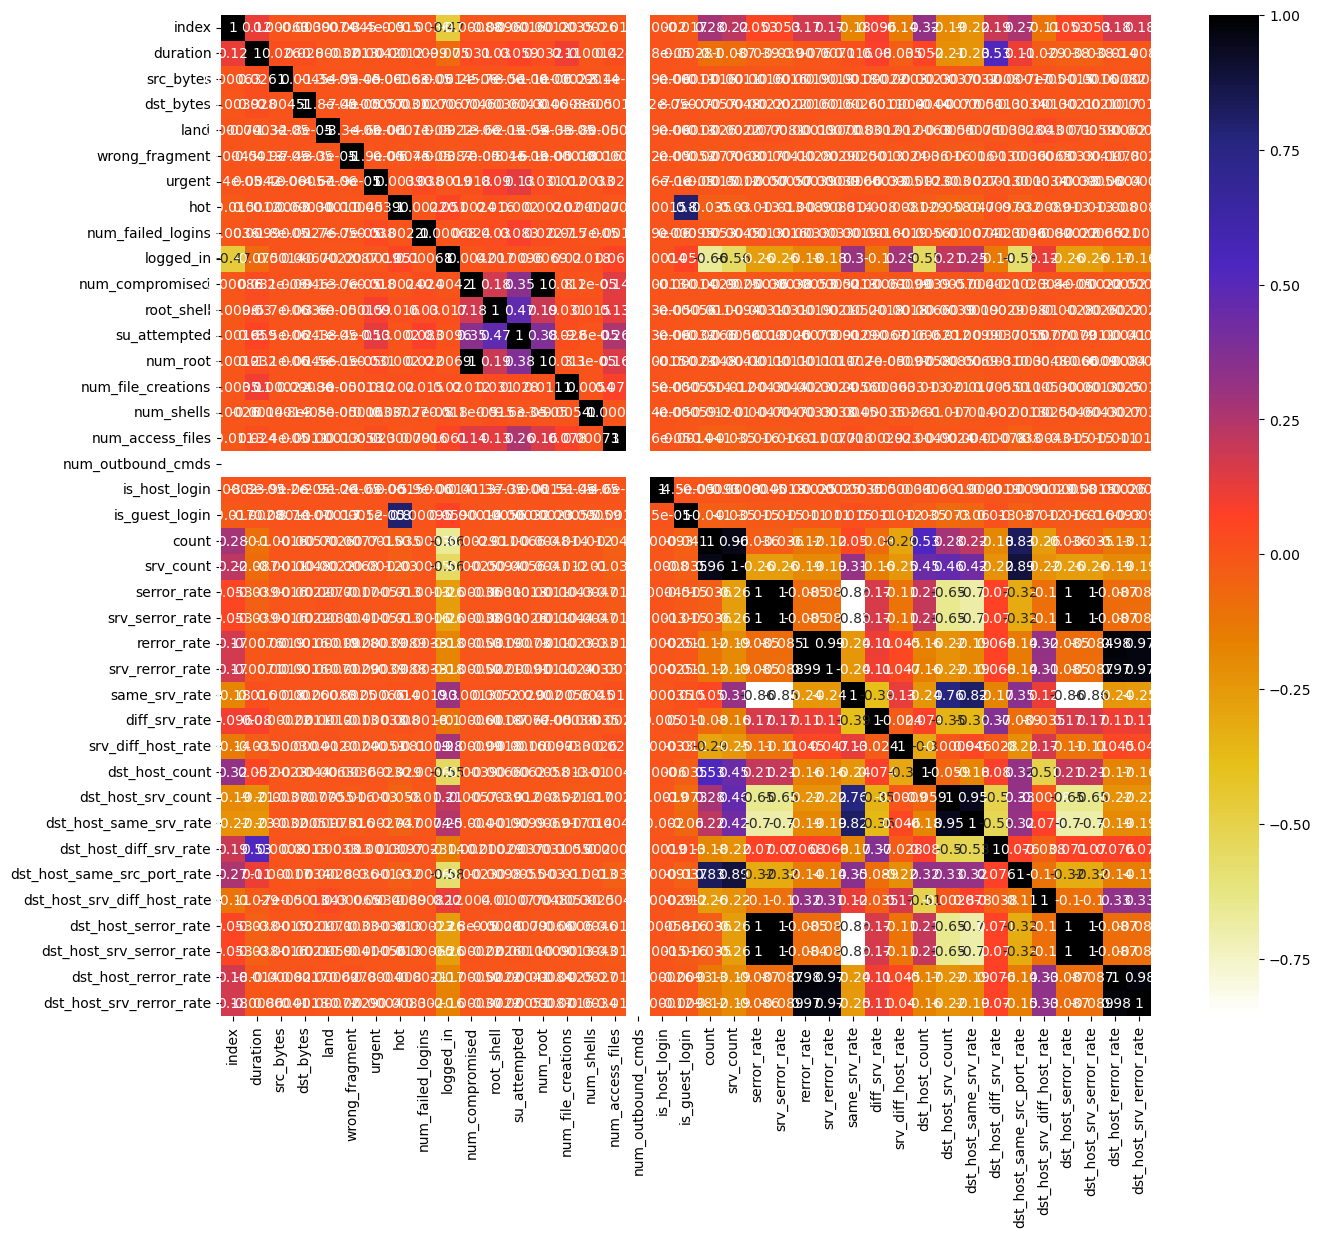

In [43]:
plt.figure(figsize=(15,13))
cor=data_temp.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [44]:
cor_col=set()
for i in range(len(cor.columns)):
    for j in range(i):
        if (cor.iloc[i,j])>0.75:
            temp=cor.columns[i]
            cor_col.add(temp)

In [45]:
print(cor_col)
print(len(cor_col))

{'dst_host_rerror_rate', 'dst_host_serror_rate', 'dst_host_same_src_port_rate', 'num_root', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate', 'srv_count', 'srv_rerror_rate', 'is_guest_login', 'dst_host_same_srv_rate', 'dst_host_srv_count', 'srv_serror_rate'}
12


In [46]:
data_temp.shape

(1945562, 39)

In [47]:
data_temp = data_temp.drop(list(cor_col),axis=1)

In [48]:
data_temp.shape

(1945562, 27)

In [49]:
data_temp['service']=balance_data['service']
data_temp['protocol_type']=balance_data['protocol_type']
data_temp['flag']=balance_data['flag']
data_temp['Target']=balance_data['Target']

In [50]:
features=data_temp.columns

In [51]:
print(features)

Index(['index', 'duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login', 'count',
       'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_srv_diff_host_rate', 'service', 'protocol_type', 'flag',
       'Target'],
      dtype='object')


In [54]:
data_enc = pd.get_dummies(data_temp, drop_first=True)

In [55]:
data_enc.head()

,index,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,873504,0,202,1408,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,3566699,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1465585,0,1032,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,378093,0,201,1856,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,4601563,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [56]:
x1 = data_enc.drop('Target', axis = 1).values
y1 = data_enc['Target']

In [57]:
y1 = y1.astype(int)

print(x1.shape)
print(y1.shape)

(1945562, 50)
(1945562,)


In [39]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt1=DecisionTreeClassifier(random_state=20,criterion='entropy',max_depth=12)
dt1.fit(x1,y1)

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=20)

In [60]:
col = []
f = []

for i,column in enumerate(data_enc.drop('Target', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt1.feature_importances_[i]))
    
    col.append(column)
    f.append(dt1.feature_importances_[i])

The feature importance for index is : 0.000543124224335352
The feature importance for duration is : 0.0001424739727922396
The feature importance for src_bytes is : 0.02585513525911917
The feature importance for dst_bytes is : 0.03718965512483085
The feature importance for land is : 0.0
The feature importance for wrong_fragment is : 0.0
The feature importance for urgent is : 0.0
The feature importance for hot is : 0.00031024356063785345
The feature importance for num_failed_logins is : 0.0
The feature importance for logged_in is : 0.0001540244462832087
The feature importance for num_compromised is : 0.0021591432322270628
The feature importance for root_shell is : 3.143848415541436e-06
The feature importance for su_attempted is : 0.0
The feature importance for num_file_creations is : 4.014754969204006e-06
The feature importance for num_shells is : 0.0
The feature importance for num_access_files is : 0.0
The feature importance for num_outbound_cmds is : 0.0
The feature importance for is_h

In [61]:
f_df = zip(col, f)
f_df = pd.DataFrame(f_df, columns = ['Feature','Feature Importance'])

f_df = f_df.sort_values('Feature Importance', ascending = False).reset_index()

In [62]:
f_df

,index,Feature,Feature Importance
0,18,count,0.913414
1,3,dst_bytes,0.037190
2,2,src_bytes,0.025855
3,33,service_http,0.014212
4,10,num_compromised,0.002159
5,32,service_ftp_data,0.001724
6,19,serror_rate,0.000886
7,29,service_ecr_i,0.000780
8,0,index,0.000543
9,36,service_smtp,0.000475


In [65]:
imp_columns = f_df['Feature'][0:30]

In [67]:
data_enc1=data_enc[imp_columns]

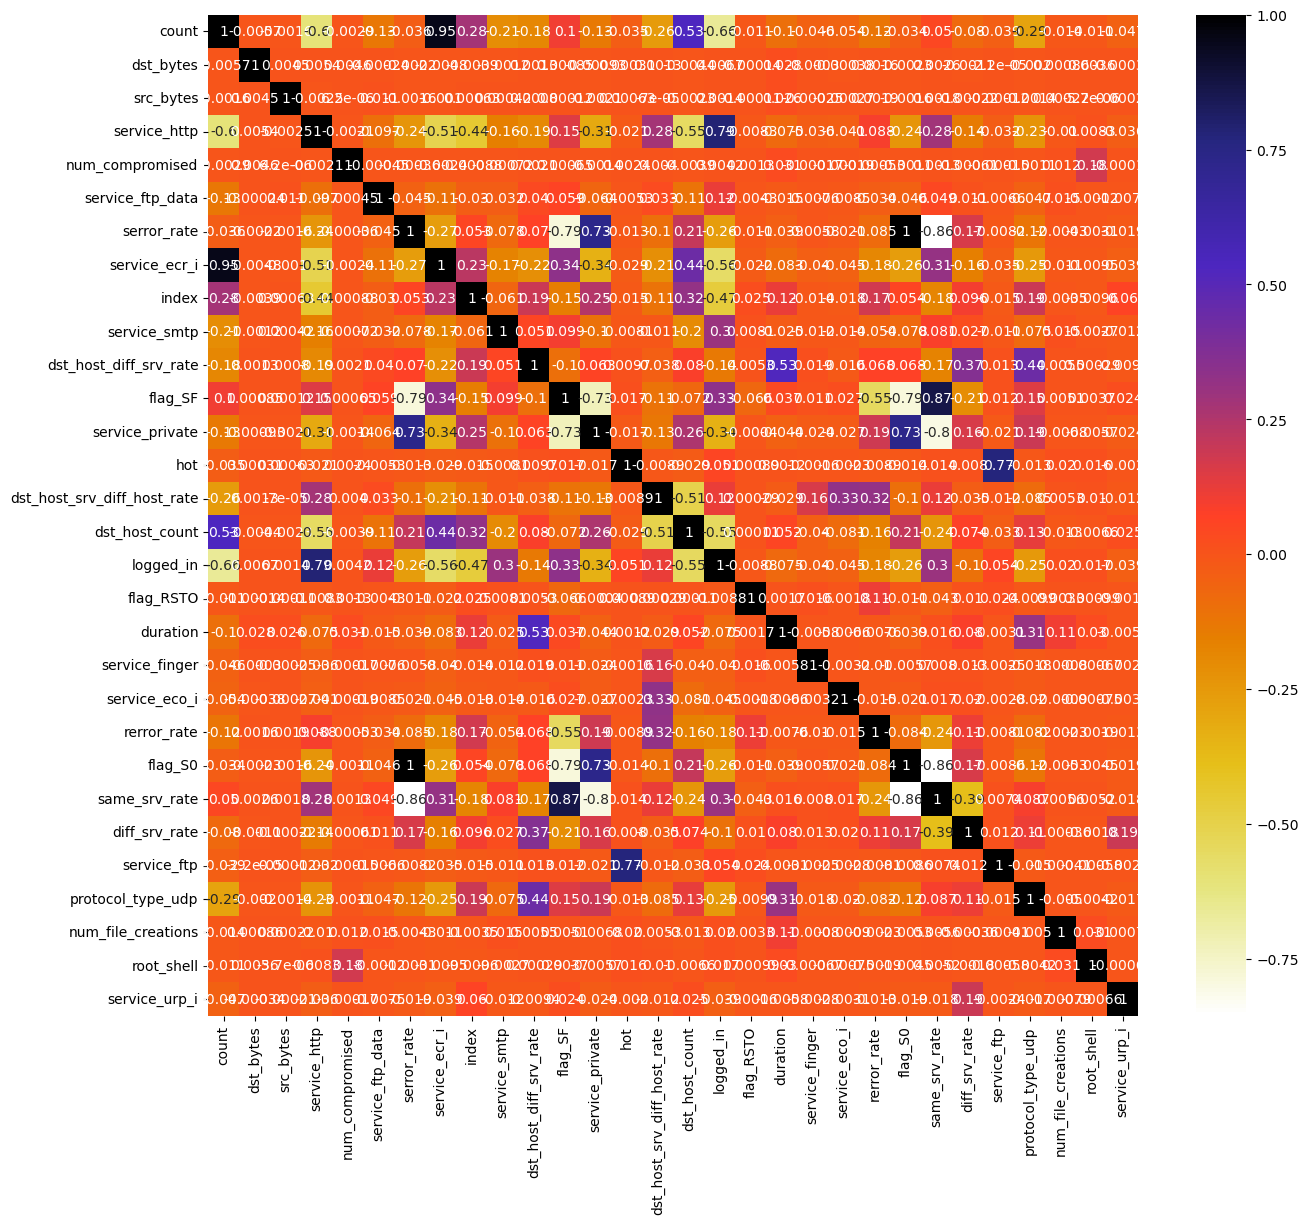

In [70]:
plt.figure(figsize=(15,13))
cor1=data_enc1.corr()
sns.heatmap(cor1,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [71]:
cor1_col=set()
for i in range(len(cor1.columns)):
    for j in range(i):
        if (cor1.iloc[i,j])>0.75:
            temp=cor1.columns[i]
            cor1_col.add(temp)

In [73]:
print(cor1_col)
print(len(cor1_col))

{'service_ftp', 'flag_S0', 'logged_in', 'service_ecr_i', 'same_srv_rate'}
5


In [74]:
data_enc1.shape

(1945562, 30)

In [75]:
data_enc1 = data_enc1.drop(list(cor1_col),axis=1)

In [76]:
data_enc1['Target']=data_enc['Target']

In [77]:
data_enc1.shape

(1945562, 26)

In [78]:
data_enc1.to_csv('enc_bal_final.csv')

In [80]:
data_nor=data_temp.drop(['service','protocol_type','flag'],axis=1)

In [81]:
x2 = data_nor.drop('Target', axis = 1).values
y2 = data_nor['Target']

In [82]:
y2 = y2.astype(int)

print(x2.shape)
print(y2.shape)

(1945562, 27)
(1945562,)


In [83]:
dt2=DecisionTreeClassifier(random_state=20,criterion='entropy',max_depth=12)
dt2.fit(x2,y2)

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=20)

In [84]:
col2 = []
f2 = []

for i,column in enumerate(data_nor.drop('Target', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt2.feature_importances_[i]))
    
    col2.append(column)
    f2.append(dt2.feature_importances_[i])

The feature importance for index is : 0.0005119665714612235
The feature importance for duration is : 0.00016087409255231708
The feature importance for src_bytes is : 0.027098590629773555
The feature importance for dst_bytes is : 0.031081733862894
The feature importance for land is : 0.0
The feature importance for wrong_fragment is : 0.0001489438600182917
The feature importance for urgent is : 0.0
The feature importance for hot is : 0.00037809456119929243
The feature importance for num_failed_logins is : 0.0
The feature importance for logged_in is : 0.000244799531757539
The feature importance for num_compromised is : 0.0021569299774626904
The feature importance for root_shell is : 0.0
The feature importance for su_attempted is : 0.0
The feature importance for num_file_creations is : 1.066862948546904e-05
The feature importance for num_shells is : 0.0
The feature importance for num_access_files is : 0.0
The feature importance for num_outbound_cmds is : 0.0
The feature importance for is_h

In [85]:
f_df2 = zip(col, f2)
f_df2 = pd.DataFrame(f_df2, columns = ['Feature','Feature Importance'])

f_df2 = f_df2.sort_values('Feature Importance', ascending = False).reset_index()

In [86]:
f_df2

,index,Feature,Feature Importance
0,18,count,0.914097
1,3,dst_bytes,0.031082
2,2,src_bytes,0.027099
3,24,dst_host_count,0.012858
4,26,dst_host_srv_diff_host_rate,0.006256
5,25,dst_host_diff_srv_rate,0.003614
6,10,num_compromised,0.002157
7,20,rerror_rate,0.000958
8,0,index,0.000512
9,7,hot,0.000378


In [87]:
imp_columns2 = f_df2['Feature'][0:17]

In [91]:
data_nor1=data_nor[imp_columns2]

In [96]:
data_nor.columns

Index(['index', 'duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login', 'count',
       'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_srv_diff_host_rate', 'Target'],
      dtype='object')

In [97]:
data_nor1['service']=data_temp['service']
data_nor1['protocol_type']=data_temp['protocol_type']
data_nor1['flag']=data_temp['flag']
data_nor1['Target']=data_temp['Target']

C:\Users\SaiRamMaganti\AppData\Local\Temp\ipykernel_14648\174027062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nor1['service']=data_temp['service']
C:\Users\SaiRamMaganti\AppData\Local\Temp\ipykernel_14648\174027062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nor1['protocol_type']=data_temp['protocol_type']
C:\Users\SaiRamMaganti\AppData\Local\Temp\ipykernel_14648\174027062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [98]:
data_nor1

,count,dst_bytes,src_bytes,dst_host_count,dst_host_srv_diff_host_rate,dst_host_diff_srv_rate,num_compromised,rerror_rate,index,hot,...,logged_in,duration,wrong_fragment,same_srv_rate,num_file_creations,diff_srv_rate,service,protocol_type,flag,Target
0,7,1408,202,48,0.04,0.00,0,0.0,873504,0,...,1,0,0,1.00,0,0.00,http,tcp,SF,1
1,280,0,0,255,0.00,0.09,0,0.0,3566699,0,...,0,0,0,0.03,0,0.05,private,tcp,S0,0
2,511,0,1032,255,0.00,0.00,0,0.0,1465585,0,...,0,0,0,1.00,0,0.00,ecr_i,icmp,SF,0
3,23,1856,201,105,0.01,0.00,0,0.0,378093,0,...,1,0,0,1.00,0,0.00,http,tcp,SF,1
4,281,0,0,255,0.00,0.07,0,1.0,4601563,0,...,0,0,0,0.04,0,0.06,private,tcp,REJ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945557,449,0,520,255,0.00,0.00,0,0.0,4036144,0,...,0,0,0,1.00,0,0.00,ecr_i,icmp,SF,0
1945558,25,133,45,113,0.01,0.00,0,0.0,227781,0,...,0,0,0,1.00,0,0.00,domain_u,udp,SF,1
1945559,1,341,1319,23,0.01,0.09,0,0.0,741924,0,...,1,5,0,1.00,0,0.00,smtp,tcp,SF,1
1945560,510,0,1032,255,0.00,0.00,0,0.0,2357347,0,...,0,0,0,1.00,0,0.00,ecr_i,icmp,SF,0
